In [1]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils import data
from torchvision import datasets as ds, models, transforms as tf, utils

import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
from PIL import Image
import rasterio

Wel'll use RasterIO to read TIF files.

In [3]:
with rasterio.open('data/RGBIR/top_potsdam_2_10_RGBIR.tif') as src:
    rgbir = src.read()

`rgbir` is now a (4, 6000, 6000) numpy array. Let's see what the image looks like:

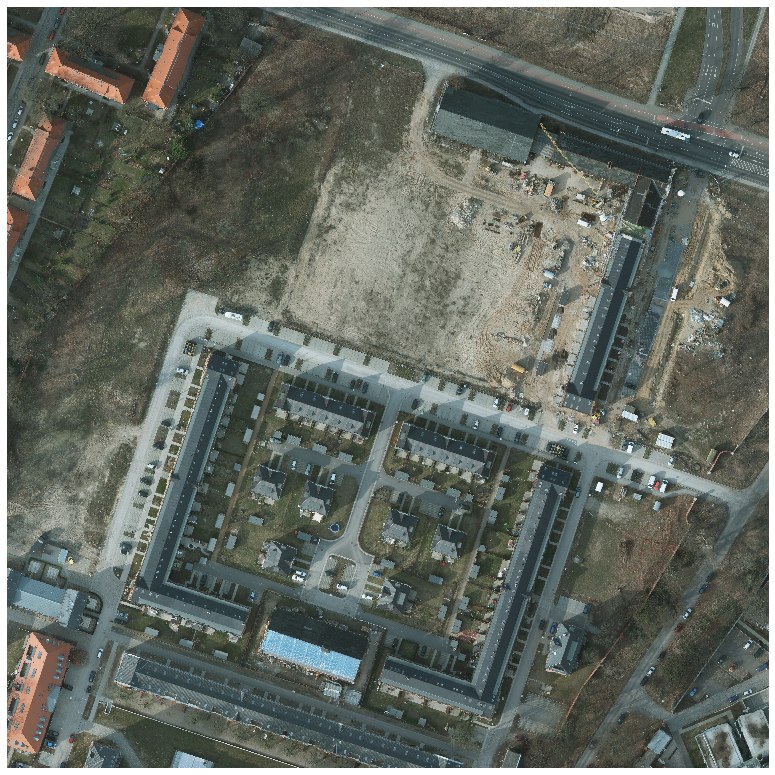

In [20]:
plt.figure(figsize=(14,14))
plt.imshow(rgbir.transpose((1, 2, 0))[..., :-1])
plt.axis('off')
plt.show()

Now let's check out what the labels look like:

In [21]:
with rasterio.open('data/labels/top_potsdam_2_10_label.tif') as src:
    label = src.read()


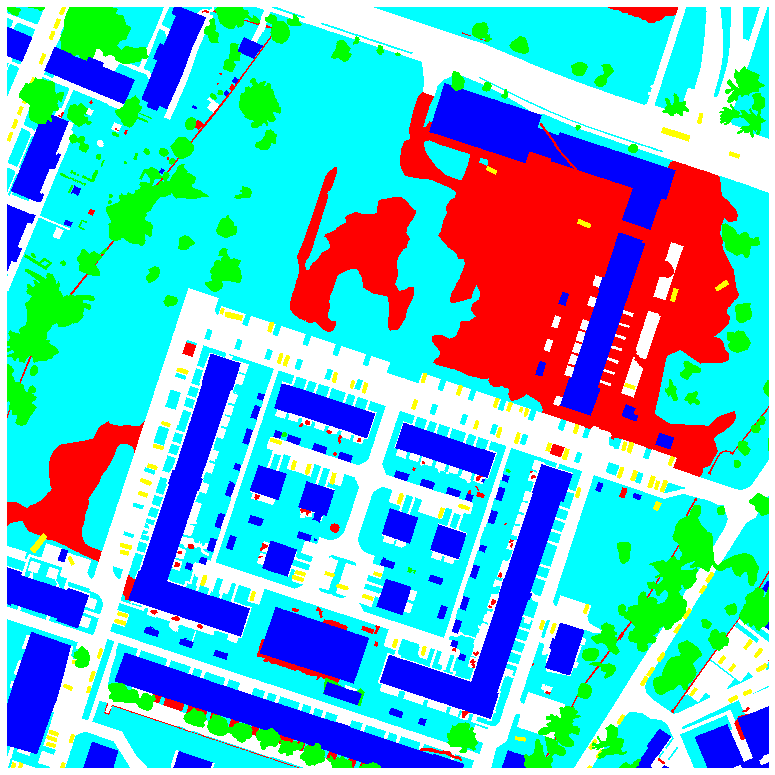

In [23]:
plt.figure(figsize=(14,14))
plt.imshow(label.transpose((1, 2, 0)))
plt.axis('off')
plt.show()

In [25]:
with rasterio.open('data/labels_no_boundary/top_potsdam_2_10_label_noBoundary.tif') as src:
    label_nb = src.read()


/home/adeel/anaconda3/lib/python3.7/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


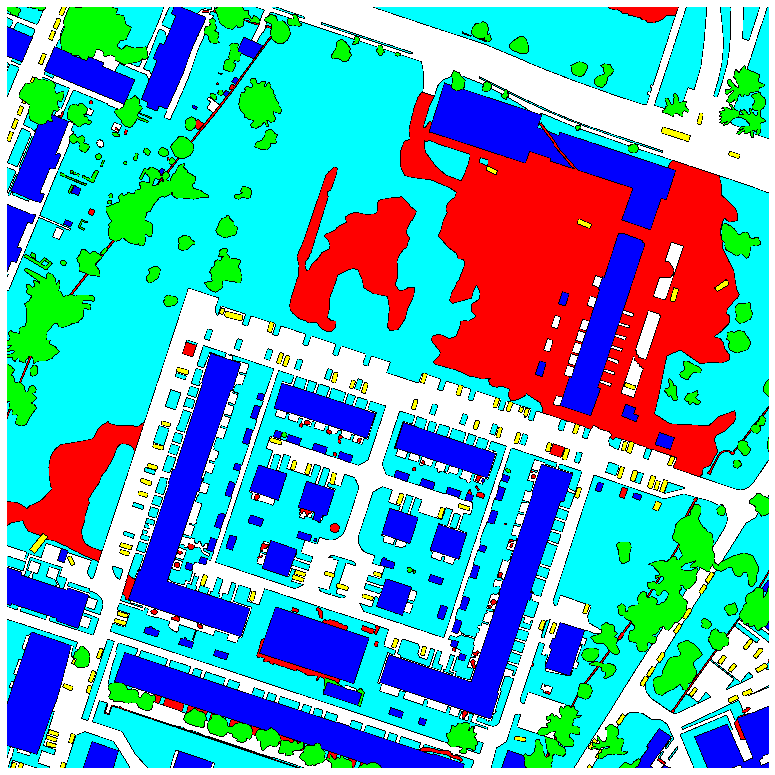

In [26]:
plt.figure(figsize=(14,14))
plt.imshow(label_nb.transpose((1, 2, 0)))
plt.axis('off')
plt.show()

In [5]:
elevation = Image.open('data/elevation/dsm_potsdam_02_10_normalized_lastools.jpg')

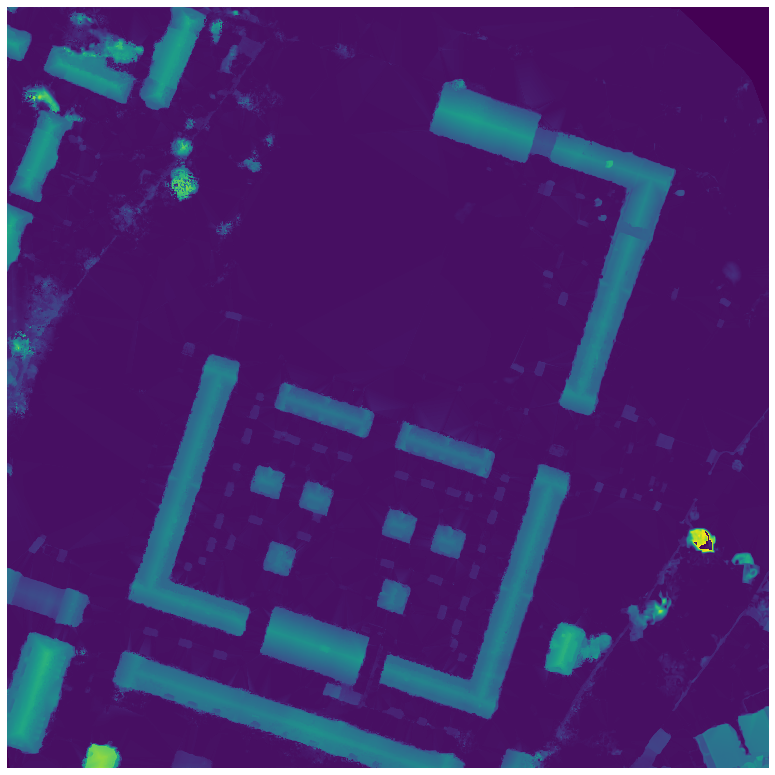

In [6]:
plt.figure(figsize=(14,14))
plt.imshow(elevation)
plt.axis('off')
plt.show()

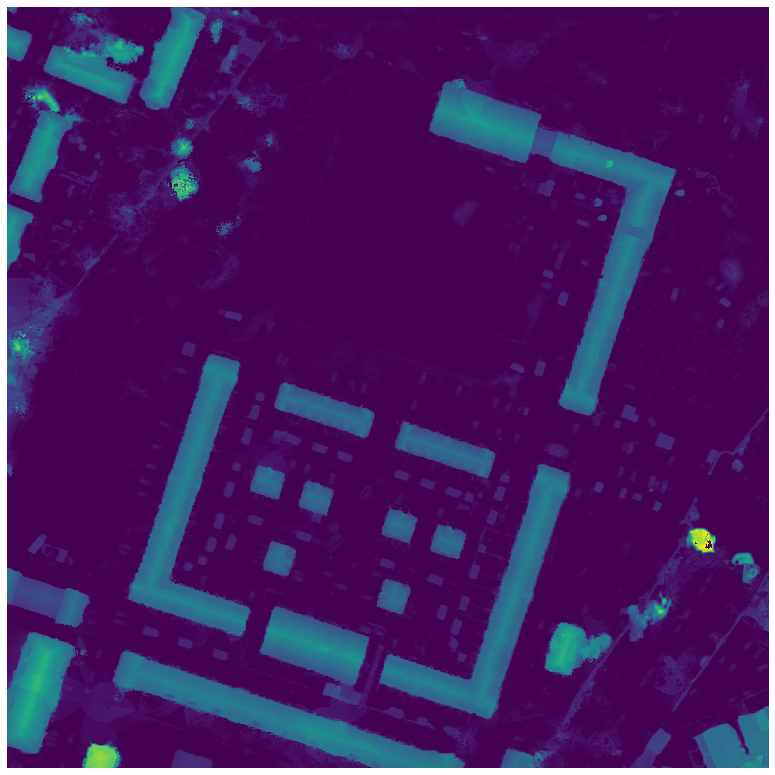

In [11]:
elevation2 = Image.open('data/elevation/dsm_potsdam_02_10_normalized_ownapproach.jpg')
plt.figure(figsize=(14,14))
plt.imshow(elevation2)
plt.axis('off')
plt.show()

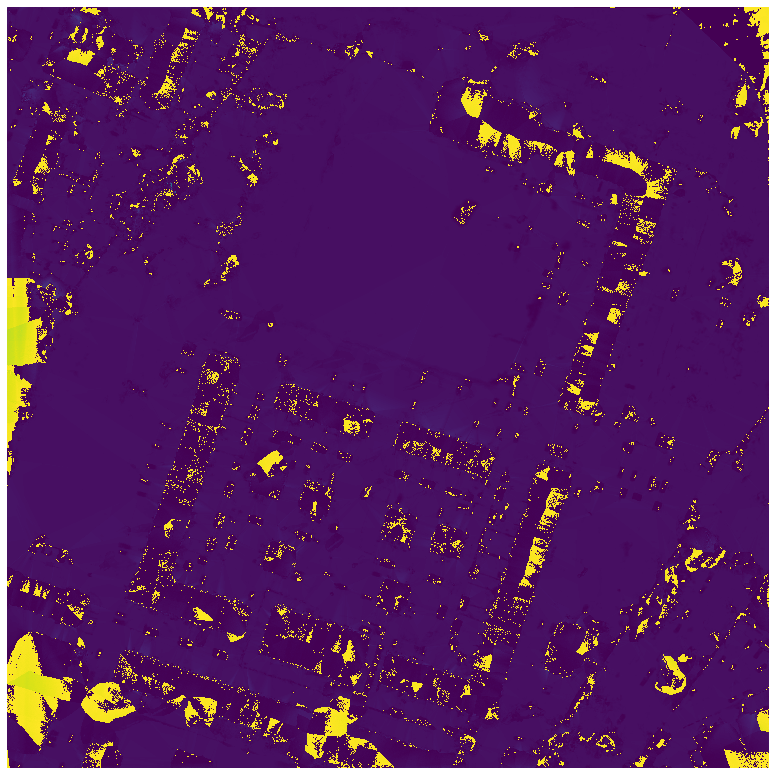

In [12]:
plt.figure(figsize=(14,14))
plt.imshow(np.abs(np.array(elevation) - np.array(elevation2)))
plt.axis('off')
plt.show()